In [168]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy.polynomial.polynomial as poly
import seaborn as sns
import matplotlib.colors as mcolors
from sympy import S, symbols


In [1]:
# note these files are not made available on git

In [170]:
f = open('../instance_files/instance_iceagg_flat_r10_compareDunnavan1', 'rb')
agg_as_flat, agg_bs_flat, agg_cs_flat, phi2Ds_flat, cplxs_flat, dds_flat = pickle.load(f)
f.close()
f = open('../instance_files/instance_iceagg_rand_r10_compareDunnavan', 'rb')
agg_as_rand, agg_bs_rand, agg_cs_rand, phi2Ds_rand, cplxs_rand, dds_rand, major_ax_zs, depths = pickle.load(f)
f.close()
f = open('../instance_files/instance_iceagg_flat_phiextremes_n100_r10', 'rb')
agg_as_flatx, agg_bs_flatx, agg_cs_flatx, phi2Ds_flatx, cplxs_flatx, dds_flatx = pickle.load(f)

In [171]:
f = open('../instance_files/instance_iceagg_flat_allphi_n150_r10_plates', 'rb')
array_plates = pickle.load(f)
agg_as_plates_flat = array_plates['agg_as']
agg_bs_plates_flat = array_plates['agg_bs']
agg_cs_plates_flat = array_plates['agg_cs']
phi2Ds_plates_flat = array_plates['phi2Ds']
cplxs_plates_flat = array_plates['cplxs']
dds_plates_flat = array_plates['dds']

f = open('../instance_files/instance_iceagg_flat_allphi_n150_r10_columns', 'rb')
array_columns = pickle.load(f)
agg_as_columns_flat = array_columns['agg_as']
agg_bs_columns_flat = array_columns['agg_bs']
agg_cs_columns_flat = array_columns['agg_cs']
phi2Ds_columns_flat = array_columns['phi2Ds']
cplxs_columns_flat = array_columns['cplxs']
dds_columns_flat = array_columns['dds']

f = open('../instance_files/instance_iceagg_rand_n150_r10_plates_reproduce', 'rb')
array_plates = pickle.load(f)
agg_as_plates_rand = array_plates['agg_as']
agg_bs_plates_rand = array_plates['agg_bs']
agg_cs_plates_rand = array_plates['agg_cs']
phi2Ds_plates_rand = array_plates['phi2Ds']
cplxs_plates_rand = array_plates['cplxs']
dds_plates_rand = array_plates['dds']

f = open('../instance_files/instance_iceagg_rand_n150_r10_columns_reproduce', 'rb')
array_columns = pickle.load(f)
agg_as_columns_rand = array_columns['agg_as']
agg_bs_columns_rand = array_columns['agg_bs']
agg_cs_columns_rand = array_columns['agg_cs']
phi2Ds_columns_rand = array_columns['phi2Ds']
cplxs_columns_rand = array_columns['cplxs']
dds_columns_rand = array_columns['dds']

In [172]:
f = open('../instance_files/instance_iceagg_rand_n150_a10_phi5_eqmajorax', 'rb')
agg_as_rand, agg_bs_rand, agg_cs_rand, phi2D_rand, dds_rand = pickle.load(f)


f = open('../instance_files/instance_iceagg_flat_n100_a1000_allphi_eqmajorax', 'rb')
array = pickle.load(f)
agg_as_flat = array['agg_as']
agg_bs_flat = array['agg_bs']
agg_cs_flat = array['agg_cs']
phi2Ds_flat = array['phi2Ds']
cplxs_flat = array['cplxs']
dds_flat = array['dds']

In [173]:
agg_as_rand = np.concatenate((agg_as_plates_rand, agg_as_columns_rand))
agg_bs_rand = np.concatenate((agg_bs_plates_rand, agg_bs_columns_rand))
agg_cs_rand = np.concatenate((agg_cs_plates_rand, agg_cs_columns_rand))
phi2Ds_rand = np.concatenate((phi2Ds_plates_rand, phi2Ds_columns_rand))
cplxs_rand = np.concatenate((cplxs_plates_rand, cplxs_columns_rand))
dds_rand = np.concatenate((dds_plates_rand, dds_columns_rand))

agg_as_flat = np.concatenate((agg_as_plates_flat, agg_as_columns_flat))
agg_bs_flat = np.concatenate((agg_bs_plates_flat, agg_bs_columns_flat))
agg_cs_flat = np.concatenate((agg_cs_plates_flat, agg_cs_columns_flat))
phi2Ds_flat = np.concatenate((phi2Ds_plates_flat, phi2Ds_columns_flat))
cplxs_flat = np.concatenate((cplxs_plates_flat, cplxs_columns_flat))
dds_flat = np.concatenate((dds_plates_flat, dds_columns_flat))

In [174]:
phica_rand = agg_cs_rand/agg_as_rand
phica_flat = agg_cs_flat/agg_as_flat
phiba_rand = agg_bs_rand/agg_as_rand
phiba_flat = agg_bs_flat/agg_as_flat

In [175]:
large = 20; med = 16; small = 14
params = {'axes.titlesize': large,
          'legend.fontsize': small,
          'figure.figsize': (7,7),
          'axes.labelsize': large,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          "font.family": "serif"}
plt.rcParams.update(params)

In [176]:
Ns = np.arange(0,99,1)
phios = [0.01, 0.10, 1.0, 10.0, 100.0]

modes_rand_ba=[]
modes_rand_ca = []
modes_flat_ba=[]
modes_flat_ca=[]

for phio in range(len(phios)):    
    for N in Ns:
        data_rand = np.vstack([phiba_rand[phio,0,:,N], phica_rand[phio,0,:,N]])
        kde_rand = st.gaussian_kde(data_rand)
        data_flat = np.vstack([phiba_flat[phio,:,:,N], phica_flat[phio,:,:,N]])
        kde_flat = st.gaussian_kde(data_flat)
        
        # evaluate on a regular grid
        xgrid = np.arange(0.0, 1.01, 0.01)
        ygrid = np.arange(0.0, 1.01, 0.01)
        Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
        
        Z_rand = kde_rand.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_rand = Z_rand.reshape(Xgrid.shape)
        Z_flat = kde_flat.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_flat = Z_flat.reshape(Xgrid.shape)

        #modes
        modes_rand_ba.append(np.where(Z_rand==np.max(Z_rand))[0]/100)
        modes_rand_ca.append(np.where(Z_rand==np.max(Z_rand))[1]/100)

        modes_flat_ba.append(np.where(Z_flat==np.max(Z_flat))[0]/100)
        modes_flat_ca.append(np.where(Z_flat==np.max(Z_flat))[1]/100)
        
#         if N == Ns[-1]:
#             print(N, phios[phio])
#             print('modes rand ba', np.where(Z_rand==np.max(Z_rand))[0]/100)
#             print('modes rand ca', np.where(Z_rand==np.max(Z_rand))[1]/100)
            #print('modes flat ba', np.where(Z_flat==np.max(Z_flat))[0]/100)
            #print('modes flat ca', np.where(Z_flat==np.max(Z_flat))[1]/100)
        


In [13]:
modes_flat_ba[:,98]

array([0.08, 0.75, 0.72, 0.73, 0.72])

In [14]:
modes_flat_ca[:,98]

array([0.83, 0.87, 0.85, 0.85, 0.85])

In [15]:
modes_flat_ba[:,98]

array([0.08, 0.75, 0.72, 0.73, 0.72])

In [16]:
modes_flat_ca[:,98]

array([0.83, 0.87, 0.85, 0.85, 0.85])

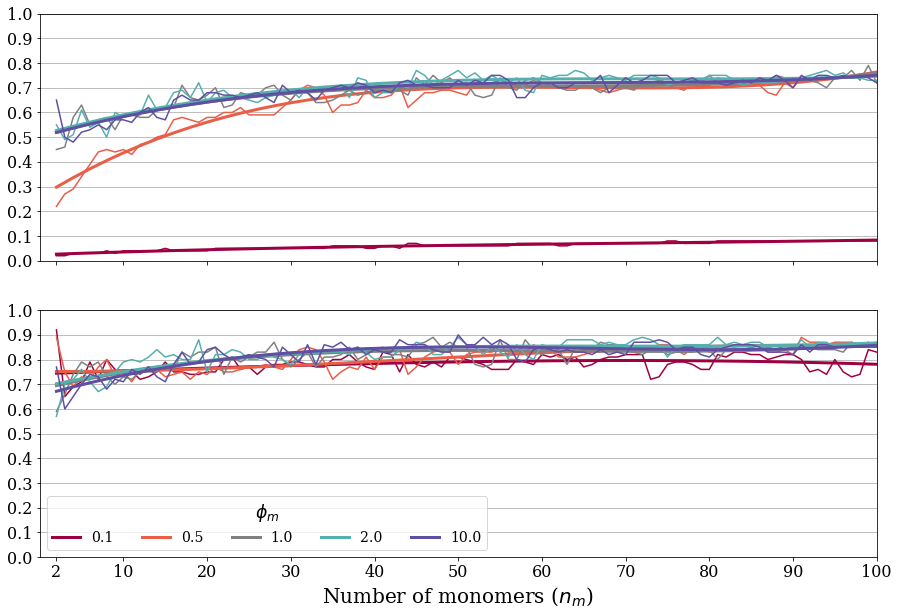

In [31]:
#eq major axis lengths
fig, axes = plt.subplots(2,1, figsize=(15,10), sharex=True);
#plt.subplots_adjust(wspace=0, hspace=0);
axs = axes.ravel()
Nm = 100
Ns = np.arange(0,Nm-1,1)
phios = [0,1,2,3,4]  
phio_labels = [0.1, 0.5, 1.0, 2.0, 10.0]
x_new = np.linspace(2, Nm+1)

#modes_rand_ba = np.reshape(modes_rand_ba, (len(phios), len(Ns)))
#modes_rand_ca = np.reshape(modes_rand_ca, (len(phios), len(Ns)))
modes_flat_ba = np.reshape(modes_flat_ba, (len(phios), len(Ns)))
modes_flat_ca = np.reshape(modes_flat_ca, (len(phios), len(Ns)))
interval=1
exp = 3 #order of polynomial for curve fit
Ns = np.arange(2,Nm+1,interval)
colors = ['#9e0142', '#ea5d47', '#fdbf6f', 'gray', '#bfe5a0', '#55afad', '#5e4fa2']
colors = ['#9e0142', '#ea5d47', 'gray', '#55afad', '#5e4fa2']
for phi in range(len(phios)):
#    axs[0].scatter(Ns, modes_rand_ba[phi,::interval], label=str(phio_labels[phi]), color=colors[phi])
#    axs[1].scatter(Ns, modes_rand_ca[phi,::interval],label=str(phio_labels[phi]), color=colors[phi])

    axs[0].plot(Ns, modes_flat_ba[phi,::interval], color=colors[phi])
    axs[1].plot(Ns, modes_flat_ca[phi,::interval], color=colors[phi])
#     axs[0].plot(Ns, modes_rand_ba[phi,::interval], '--', color=colors[phi])
#     axs[1].plot(Ns, modes_rand_ca[phi,::interval], '--', color=colors[phi])
    
    coefs = poly.polyfit(Ns, modes_flat_ba[phi,::interval], exp)
    ffit = poly.polyval(x_new, coefs)
    axs[0].plot(x_new, ffit, linewidth=3, color=colors[phi], label=str(phio_labels[phi]))
#     coefs = poly.polyfit(Ns, modes_rand_ba[phi,::interval], exp)
#     ffit = poly.polyval(x_new, coefs)
#    axs[0].plot(x_new, ffit, '--', linewidth=3, color=colors[phi])
    
    coefs = poly.polyfit(Ns, modes_flat_ca[phi,::interval], exp)
    ffit = poly.polyval(x_new, coefs)
    axs[1].plot(x_new, ffit, linewidth=3, color=colors[phi], label=str(phio_labels[phi]))
#     coefs = poly.polyfit(Ns, modes_rand_ca[phi,::interval], exp)
#     ffit = poly.polyval(x_new, coefs)
#     axs[1].plot(x_new, ffit, '--', linewidth=3, color=colors[phi])
    
plt.rcParams['legend.title_fontsize'] = 'xx-large'
#axs[0].legend(title='$\phi_m$', ncol=7);
axs[1].legend(title='$\phi_m$', ncol=7);

axs[0].set_xlim(0.0,Nm)
axs[1].set_xlim(0.0,Nm)
axs[0].set_ylim(0.0,1.0)
axs[1].set_ylim(0.0,1.0)
#axs[0].set_ylabel('$\phi_{ca}$', fontsize=30)
#axs[1].set_ylabel('$\phi_{ba}$', fontsize=30)
axs[1].set_xlabel('Number of monomers ($\it{n}_m$)')
axs[0].yaxis.grid(True, which='major')
axs[0].yaxis.set_ticks(np.arange(0.0,0.8, 0.05))
axs[0].yaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].yaxis.set_ticks(np.arange(0.0,0.8, 0.05))
axs[0].xaxis.set_major_locator(plt.MaxNLocator(16))
axs[0].xaxis.set_ticks([2,10,20,30,40,50,60,70,80,90,100])
axs[1].xaxis.set_major_locator(plt.MaxNLocator(16))
axs[1].xaxis.set_ticks([2,10,20,30,40,50,60,70,80,90,100])

#axs[1].xaxis.set_ticks([2,10,20,30,40,50])

axs[1].yaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].yaxis.grid(True, which='major')
#fig.savefig('../plots/N150_phi_asymptote_bestfit.png', bbox_inches='tight', dpi=300)


0.01
0.1
0.5
1.0
2.0


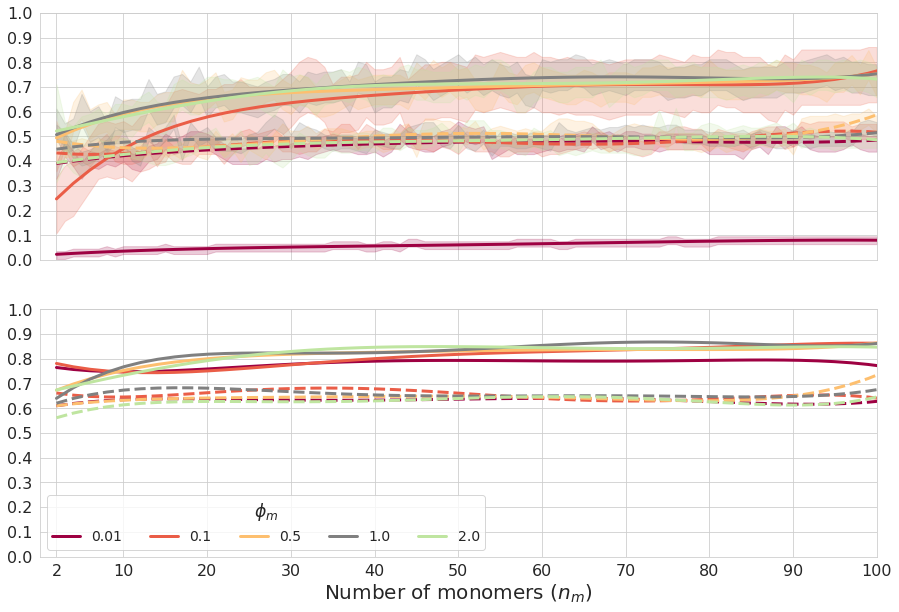

In [25]:
fig, axes = plt.subplots(2,1, figsize=(15,10), sharex=True);
#plt.subplots_adjust(wspace=0, hspace=0);
axs = axes.ravel()
Nm =100
Ns = np.arange(0,Nm-1,1)
phios = [0,1,2,3,4]
phio_labels = [0.01, 0.10, 0.50, 1.0, 2.0, 10.0, 100.0]
x_new = np.linspace(2, Nm+1)

modes_rand_ba = np.reshape(modes_rand_ba, (len(phios), len(Ns)))
modes_rand_ca = np.reshape(modes_rand_ca, (len(phios), len(Ns)))

modes_flat_ba = np.reshape(modes_flat_ba, (len(phios), len(Ns)))
modes_flat_ca = np.reshape(modes_flat_ca, (len(phios), len(Ns)))
interval=1
Ns = np.arange(2,Nm+1,interval)

colors = ['#9e0142', '#ea5d47', '#fdbf6f', 'gray', '#bfe5a0', '#55afad', '#5e4fa2']
for phi in range(len(phios)):
#    axs[0].scatter(Ns, modes_rand_ba[phi,::interval], label=str(phio_labels[phi]), color=colors[phi])
    #axs[1].scatter(Ns, modes_rand_ca[phi,::interval],label=str(phio_labels[phi]), color=colors[phi])

#     axs[0].plot(Ns, modes_flat_ba[phi,::interval], color=colors[phi])
#     axs[1].plot(Ns, modes_flat_ca[phi,::interval], color=colors[phi])
#     axs[0].plot(Ns, modes_rand_ba[phi,::interval], '--', color=colors[phi])
#     axs[1].plot(Ns, modes_rand_ca[phi,::interval], '--', color=colors[phi])
    
    coefs = poly.polyfit(Ns, modes_flat_ba[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[0].plot(x_new, ffit, linewidth=3, color=colors[phi], label=str(phio_labels[phi]))
    error = np.std(modes_flat_ba[phi,::interval])
    axs[0].fill_between(Ns, modes_flat_ba[phi,::interval]-error, modes_flat_ba[phi,::interval]+error, color=colors[phi], alpha =0.2)
    
    coefs = poly.polyfit(Ns, modes_rand_ba[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[0].plot(x_new, ffit, '--', linewidth=3, color=colors[phi])
    error = np.std(modes_rand_ba[phi,::interval])
    axs[0].fill_between(Ns, modes_rand_ba[phi,::interval]-error, modes_rand_ba[phi,::interval]+error, color=colors[phi], alpha =0.2)

    
    coefs = poly.polyfit(Ns, modes_flat_ca[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    print(str(phio_labels[phi]))
    axs[1].plot(x_new, ffit, linewidth=3, color=colors[phi], label=str(phio_labels[phi]))
    coefs = poly.polyfit(Ns, modes_rand_ca[phi,::interval], 5)
    ffit = poly.polyval(x_new, coefs)
    axs[1].plot(x_new, ffit, '--', linewidth=3, color=colors[phi])
    
plt.rcParams['legend.title_fontsize'] = 'xx-large'
#axs[0].legend(title='$\phi_m$', ncol=7);
axs[1].legend(title='$\phi_m$', ncol=7);

axs[0].set_xlim(0.0,Nm)
axs[1].set_xlim(0.0,Nm)
axs[0].set_ylim(0.0,1.0)
axs[1].set_ylim(0.0,1.0)
#axs[0].set_ylabel('$\phi_{ca}$', fontsize=30)
#axs[1].set_ylabel('$\phi_{ba}$', fontsize=30)
axs[1].set_xlabel('Number of monomers ($\it{n}_m$)')
axs[0].yaxis.grid(True, which='major')
axs[0].yaxis.set_ticks(np.arange(0.0,0.8, 0.05))
axs[0].yaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].yaxis.set_ticks(np.arange(0.0,0.8, 0.05))
axs[0].xaxis.set_major_locator(plt.MaxNLocator(16))
axs[0].xaxis.set_ticks([2,10,20,30,40,50,60,70,80,90,100])
axs[1].xaxis.set_major_locator(plt.MaxNLocator(16))
axs[1].xaxis.set_ticks([2,10,20,30,40,50,60,70,80,90,100])

#axs[1].xaxis.set_ticks([2,10,20,30,40,50])

axs[1].yaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].yaxis.grid(True, which='major')
#fig.savefig('../plots/N150_phi_asymptote_bestfit.png', bbox_inches='tight', dpi=300)


In [81]:
def poly2latex(poly, variable="x", width=2):
    t = ["{0:0.{width}f}"]
    t.append(t[-1] + " {variable}")
    t.append(t[-1] + "^{1}")

    def f():
        for i, v in enumerate(reversed(poly)):
            idx = i if i < 2 else 2
            yield t[idx].format(v, i, variable=variable, width=width)

    return "${}$".format("+".join(f()))

No handles with labels found to put in legend.


[ 2.13542874e-02  1.83652698e-03 -4.02107456e-05  4.99301596e-07
 -2.21772571e-09]
y=$+0.02x^4+0.00x^3-0.00x^2+0.00x^1-0.00x^0$
[ 2.08340817e-01  2.93665990e-02 -6.73142815e-04  6.77030298e-06
 -2.44997188e-08]
y=$+0.21x^4+0.03x^3-0.00x^2+0.00x^1-0.00x^0$
[ 4.70739720e-01  1.52324467e-02 -4.09382019e-04  4.90520364e-06
 -2.08734197e-08]
y=$+0.47x^4+0.02x^3-0.00x^2+0.00x^1-0.00x^0$
[ 4.90787673e-01  1.02712167e-02 -1.42409538e-04  6.79653278e-07
 -2.74263465e-10]
y=$+0.49x^4+0.01x^3-0.00x^2+0.00x^1-0.00x^0$
[ 5.19600800e-01  7.87006709e-03 -9.35978968e-05  2.01709533e-07
  1.73110602e-09]
y=$+0.52x^4+0.01x^3-0.00x^2+0.00x^1+0.00x^0$


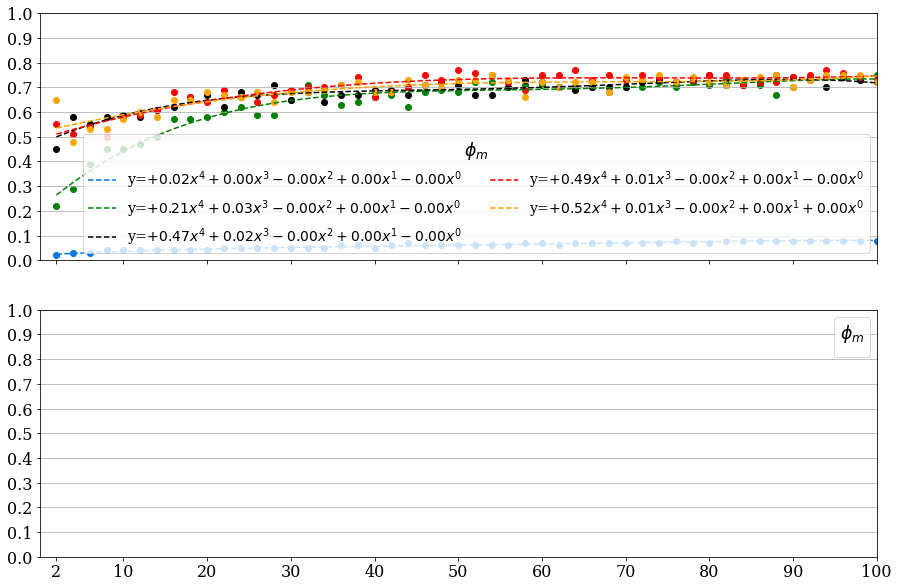

In [112]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

fig, axes = plt.subplots(2,1, figsize=(15,10), sharex=True);
#plt.subplots_adjust(wspace=0, hspace=0);
axs = axes.ravel()
Ns = np.arange(0,99,1)
phios = [0,2,3,4,6]  
phio_labels = [0.1, 0.5, 1.0, 2.0, 10.0]

modes_rand_ba = np.reshape(modes_rand_ba, (len(phios), len(Ns)))
modes_rand_ca = np.reshape(modes_rand_ca, (len(phios), len(Ns)))
modes_flat_ba = np.reshape(modes_flat_ba, (len(phios), len(Ns)))
modes_flat_ca = np.reshape(modes_flat_ca, (len(phios), len(Ns)))
interval=2
Ns = np.arange(2,101,interval)
order=4
colors = ['#0077E0', 'green', 'k', 'red', 'orange']
for phi in range(len(phios)):
#    axs[0].scatter(Ns, modes_rand_ba[phi,::interval], label=str(phio_labels[phi]), color=colors[phi])
#     axs[0].plot(Ns, modes_flat_ba[phi,::interval], color=colors[phi])
#     axs[1].plot(Ns, modes_flat_ca[phi,::interval], color=colors[phi])
    
    x_new = np.linspace(2, 101)
    coefs = poly.polyfit(Ns, modes_flat_ba[phi,::interval], order)
    
    fit = poly.polyval(x_new, coefs)
    ffit = np.poly1d(coefs)
#     print(coefs)
#     label='y=${}$'.format(''.join(['{}x^{}'.format(('{:.2f}'.format(j) if j<0 else '+{:.2f}'.format(j)),(len(coefs)-i-1)) for i,j in enumerate(coefs)]))
#     print(label)



    #Edit: added second square bracket above to fix the ValueError problem

    poly = PolynomialFeatures(degree=2)
    X_ = poly.fit_transform(x_new)
    predict_ = poly.fit_transform(predict)

    clf = linear_model.LinearRegression()
    clf.fit(X_, modes_flat_ba[phi,::interval])
    print clf.predict(predict_)
    
#     coefs = poly.polyfit(Ns, modes_rand_ba[phi,::interval], order)
#     ffit = poly.polyval(x_new, coefs)
    axs[0].scatter(Ns, modes_flat_ba[phi,::interval], color=colors[phi])
    axs[0].plot(x_new, fit, linestyle='--', color=colors[phi], label=label)
    
    
#     coefs = poly.polyfit(Ns, modes_flat_ca[phi,::interval], order)
#     fit = poly.polyval(x_new, coefs)
#     ffit = np.poly1d(coefs)
#     print(coefs)
#     label='y=${}$'.format(''.join(['{}x^{}'.format(('{:.2f}'.format(j) if j<0 else '+{:.2f}'.format(j)),(len(coefs)-i-1)) for i,j in enumerate(coefs)]))
#     print(label)
    #label=poly2latex(coefs)
#     axs[1].scatter(Ns, modes_flat_ba[phi,::interval], color=colors[phi])
#     axs[1].plot(x_new, fit, linestyle='-', color=colors[phi], label=label)
    
#     coefs = poly.polyfit(Ns, modes_rand_ca[phi,::interval], order)
#     ffit = poly.polyval(x_new, coefs)
#     axs[1].plot(x_new, ffit,'--', color=colors[phi])

plt.rcParams['legend.title_fontsize'] = 'xx-large'
axs[0].legend(title='$\phi_m$', ncol=2);
axs[1].legend(title='$\phi_m$', ncol=2);
axs[0].set_xlim(0.0,100)
axs[1].set_xlim(0.0,100)
axs[0].set_ylim(0.0,1.0)
axs[1].set_ylim(0.0,1.0)
# axs[0].set_ylabel('$\phi_{ca}$', fontsize=30, fontfamily='serif')
# axs[1].set_ylabel('$\phi_{ba}$', fontsize=30, fontfamily='serif')
# axs[1].set_xlabel('Number of monomers ($\it{n}_m$)')
axs[0].yaxis.grid(True, which='major')
axs[0].yaxis.set_ticks(np.arange(0.0,0.8, 0.05))
axs[0].yaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].yaxis.set_ticks(np.arange(0.0,0.8, 0.05))
axs[0].xaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].xaxis.set_ticks([2,10,20,30,40,50,60,70,80,90,100])
axs[1].yaxis.set_major_locator(plt.MaxNLocator(10))
axs[1].yaxis.grid(True, which='major')

#plt.savefig('../plots/N_phi_asymptopte_bestfit.pdf', dpi=300)

0.0038895759880352683
0.9394751105508861
0.04296254329659901
0.8602278930432645
0.025837488432067804
0.8034807746608073
0.02708404765982499
0.8400620878852287
0.030549936125711764
0.7518773136657586


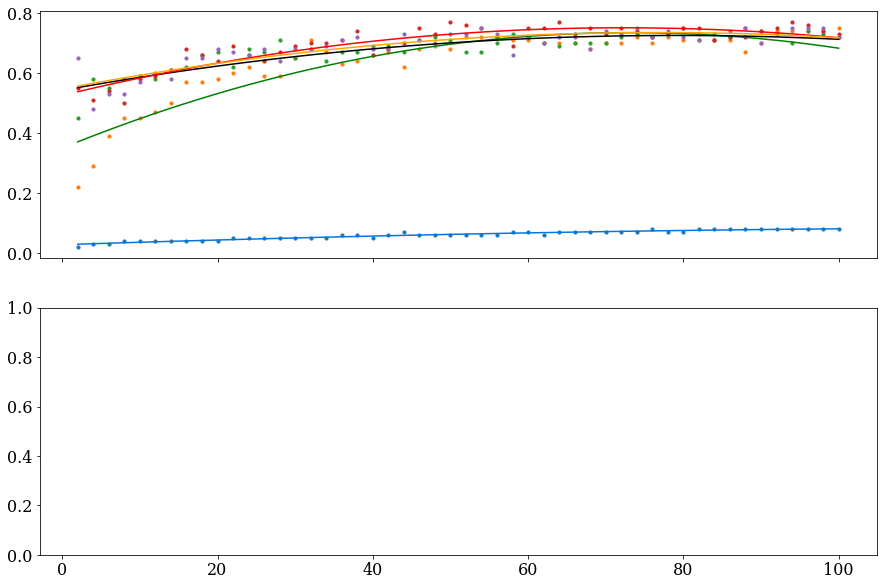

In [139]:
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
import operator

fig, axes = plt.subplots(2,1, figsize=(15,10), sharex=True);
#plt.subplots_adjust(wspace=0, hspace=0);
axs = axes.ravel()

nb_degree = 16
interval=2
phi=0
for phi in range(len(phios)):
    x = np.arange(2,101,interval)
    x = x[:,np.newaxis]

    y = modes_flat_ba[phi,::interval]
    y = y[:, np.newaxis]

    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print(rmse)
    print(r2)

    axs[0].scatter(x, y, s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    axs[0].plot(x, y_poly_pred, color=colors[phi])

[[ 0.00000000e+00  1.14368413e-03 -1.03449503e-05  4.68855516e-08]]
[[0.0274481 ]
 [0.02961395]
 [0.03170155]
 [0.03371314]
 [0.03565097]
 [0.03751729]
 [0.03931436]
 [0.04104442]
 [0.04270972]
 [0.04431252]
 [0.04585507]
 [0.04733961]
 [0.0487684 ]
 [0.05014368]
 [0.05146772]
 [0.05274275]
 [0.05397102]
 [0.0551548 ]
 [0.05629633]
 [0.05739786]
 [0.05846163]
 [0.05948991]
 [0.06048494]
 [0.06144898]
 [0.06238426]
 [0.06329305]
 [0.06417759]
 [0.06504014]
 [0.06588294]
 [0.06670824]
 [0.0675183 ]
 [0.06831537]
 [0.06910169]
 [0.06987953]
 [0.07065111]
 [0.07141871]
 [0.07218457]
 [0.07295093]
 [0.07372005]
 [0.07449419]
 [0.07527558]
 [0.07606649]
 [0.07686916]
 [0.07768584]
 [0.07851878]
 [0.07937023]
 [0.08024245]
 [0.08113769]
 [0.08205818]
 [0.0830062 ]] [[1.40252017e+01]
 [8.40252017e+01]
 [2.58025202e+02]
 [5.84025202e+02]
 [1.11002520e+03]
 [1.88402520e+03]
 [2.95402520e+03]
 [4.36802520e+03]
 [6.17402520e+03]
 [8.42002520e+03]
 [1.11540252e+04]
 [1.44240252e+04]
 [1.82780252e+0

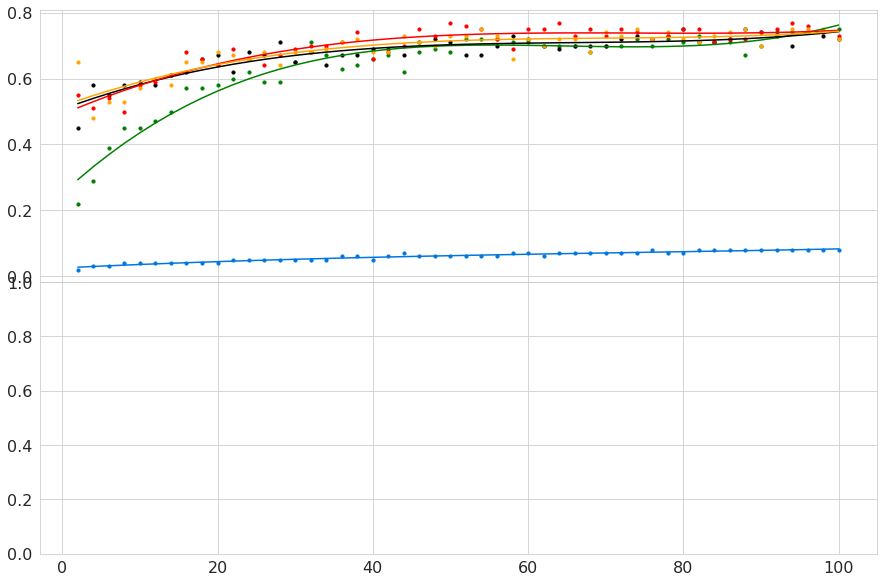

In [167]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

fig, axes = plt.subplots(2,1, figsize=(15,10), sharex=True);
plt.subplots_adjust(wspace=0, hspace=0);
axs = axes.ravel()


for phi in range(len(phios)):

    np.random.seed(0)
    x = np.arange(2,101,interval)
    y = modes_flat_ba[phi,::interval]

    # transforming the data to include another axis
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]

    polynomial_features= PolynomialFeatures(degree=3)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    coef = model.coef_[0]
    print(model.coef_)
    #print(model.intercept_)
    y_eq = model.intercept_ + coef[0] + coef[1]*x + coef[2]*x**2 + coef[3]*x**3 
    print(y_eq, model.intercept_+x + x**2 + x**3)
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    #print(rmse)
    #print(r2)

    axs[0].scatter(x, y, color=colors[phi], s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    axs[0].plot(x, y_poly_pred, color=colors[phi])


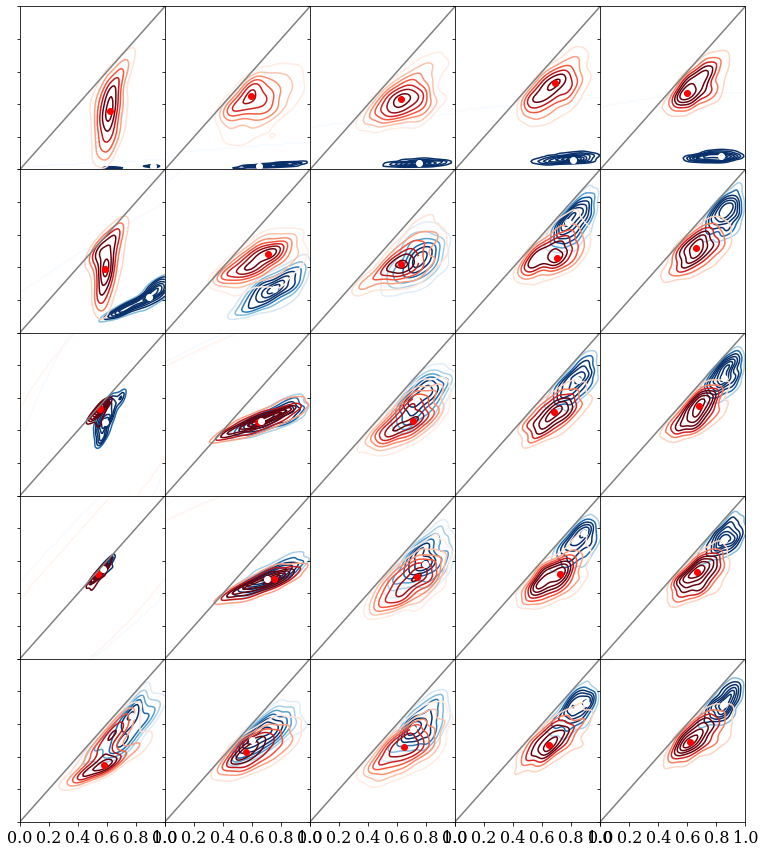

In [162]:
fig, axes = plt.subplots(5,5, figsize=(13,15), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)
Ns = [0,1,8,48,98]
phios = [0,1,2,3,4]
#fig = plt.figure()
sns.set_style('whitegrid')
axs = axes.ravel()
start=0
end=19
i=0

for phio in phios:    
    for N in Ns:
        #print(i)
        data_rand = np.vstack([phiba_rand[phio,:,:,N], phica_rand[phio,:,:,N]])
        kde_rand = st.gaussian_kde(data_rand)
        data_flat = np.vstack([phiba_flat[phio,:,:,N], phica_flat[phio,:,:,N]])
        kde_flat = st.gaussian_kde(data_flat)
        
        # evaluate on a regular grid
        xgrid = np.arange(0.0, 1.01, 0.01)
        ygrid = np.arange(0.0, 1.01, 0.01)
        Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
        Z_rand = kde_rand.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_rand = Z_rand.reshape(Xgrid.shape)
        
        Z_flat = kde_flat.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_flat = Z_flat.reshape(Xgrid.shape)
        
        #img = axs[i].imshow(Z_rand, origin='lower', aspect='auto',
        #           cmap='Blues', vmin=1, vmax=10)
        img = axs[i].contour(Z_flat, cmap='Blues', vmin=1, vmax=10)
        img = axs[i].contour(Z_rand, cmap='Reds', vmin=1, vmax=10)
        
        #modes
        modes_rand = np.where(Z_rand==np.max(Z_rand))
        modes_flat = np.where(Z_flat==np.max(Z_flat))
        axs[i].plot(float(modes_rand[1]), float(modes_rand[0]), 'ro')
        axs[i].plot(float(modes_flat[1]), float(modes_flat[0]), 'wo')
        

    #     for x,y in zip(xs[start:end],ys[start:end]):
    #         ax.plot(x*100,y*100, "r+")
    #     start+=19
    #     end+=19
        axs[i].plot(np.linspace(0.0,100,10),np.linspace(0.0,100,10), 'gray', '--', zorder=2)
        axs[i].set_xticks([0,20,40,60,80,100])
        axs[i].set_yticks([0,20,40,60,80,100])
        axs[i].set_xticklabels([0.0,0.2,0.4,0.6,0.8,1.0])
        axs[i].set_yticklabels([])
        i+=1

# m = plt.cm.ScalarMappable(cmap='Reds')
# m.set_array(Z_flat)
# m.set_clim(0., 10.)
# c = plt.cm.ScalarMappable(cmap='Blues')
# c.set_array(Z_rand)
# c.set_clim(0., 10.)
# plt.colorbar(m, boundaries=np.linspace(0, 10, 6))
# plt.colorbar(c, boundaries=np.linspace(0, 10, 6))


#fig.savefig('../plots/phi_ba_ca_iceagg_N150_pdfs.eps', format='eps', dpi=300);


In [19]:
#prints the primary shape per phi_m-N pair as oblate or prolate
Ns = [0, 1, 8, 48, 98, 148]
phioarr=[0.01, 0.1, 0.5, 1.0, 2.0, 10., 100]
phios = [0,1,2,3,4,5,6] #0.1, 0.25, 0.5, 1.0, 2.0, 4.0, 10.
print('phi \t N \t oblates\t prolates \tprolates majority?')

for c, phio in enumerate(phios):    
    for n, N in enumerate(Ns):
        oblates = 0
        prolates = 0
        for l in range(300):
            if agg_bs_flat[phio,0,l,N] - agg_cs_flat[phio,0,l,N] <= agg_as_flat[phio,0,l,N] - agg_bs_flat[phio,0,l,N]:
                prolates +=1
            else:
                oblates+=1
        if prolates>oblates:
            bigger = 'True'
        else:
            bigger = ' '
            
            
        print('%3.2f, %5d, %10.2f, %15.2f, %15s' %(phioarr[phio], Ns[n]+2, (oblates/300)*100, (prolates/300)*100, bigger))
            


phi 	 N 	 oblates	 prolates 	prolates majority?
0.01,     2,     100.00,            0.00,                
0.01,     3,      98.00,            2.00,                
0.01,    10,      98.00,            2.00,                
0.01,    50,      99.00,            1.00,                
0.01,   100,     100.00,            0.00,                
0.01,   150,      99.33,            0.67,                
0.10,     2,     100.00,            0.00,                
0.10,     3,      86.00,           14.00,                
0.10,    10,      57.00,           43.00,                
0.10,    50,      35.67,           64.33,            True
0.10,   100,      47.67,           52.33,            True
0.10,   150,      38.67,           61.33,            True
0.50,     2,       0.00,          100.00,            True
0.50,     3,      46.33,           53.67,            True
0.50,    10,      36.33,           63.67,            True
0.50,    50,      37.67,           62.33,            True
0.50,   100,      39.33,